<a href="https://www.kaggle.com/code/shadabjamadar/diabetes-prediction-and-evaluation?scriptVersionId=166289975" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os 
os.getcwd()

'/kaggle/working'

In [3]:
cd=pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

In [4]:
cd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

In [5]:
cd.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

We do not have other dataset, so no need of data intergration(pd.merge())

In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
cd.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
cd.describe().T.style.background_gradient(axis=0, cmap='Set2')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


### Handling Null Values

In [9]:
cd.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Null values are present

In [10]:
cd.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [11]:
cd['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
label=cd['Outcome'].value_counts().index

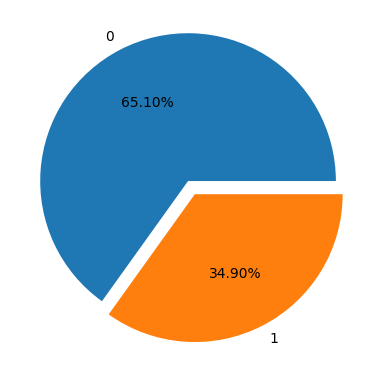

In [13]:
#no only cd['Outcome'] because it contain whole column values not counts
plt.pie(cd['Outcome'].value_counts(),labels=label,autopct='%.2f%%',explode= (0.1, 0))
plt.show()

Here, we can see '0' has almost double values than '1'. It makes the model to work as biased or may give inaccurate result for '1'.

In [14]:
cd.groupby(['Outcome','Pregnancies']).size()#.reset_index().rename(columns={0:'No. of Records'})

Outcome  Pregnancies
0        0               73
         1              106
         2               84
         3               48
         4               45
         5               36
         6               34
         7               20
         8               16
         9               10
         10              14
         11               4
         12               5
         13               5
1        0               38
         1               29
         2               19
         3               27
         4               23
         5               21
         6               16
         7               25
         8               22
         9               18
         10              10
         11               7
         12               4
         13               5
         14               2
         15               1
         17               1
dtype: int64

<Axes: >

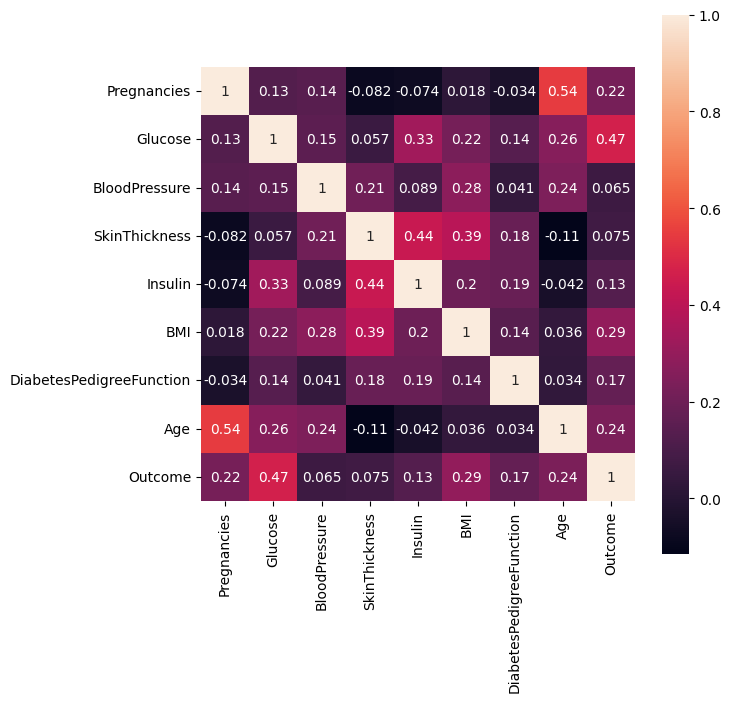

In [15]:
plt.figure(figsize=(7,7))
sns.heatmap(cd.corr(),annot=True,square=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

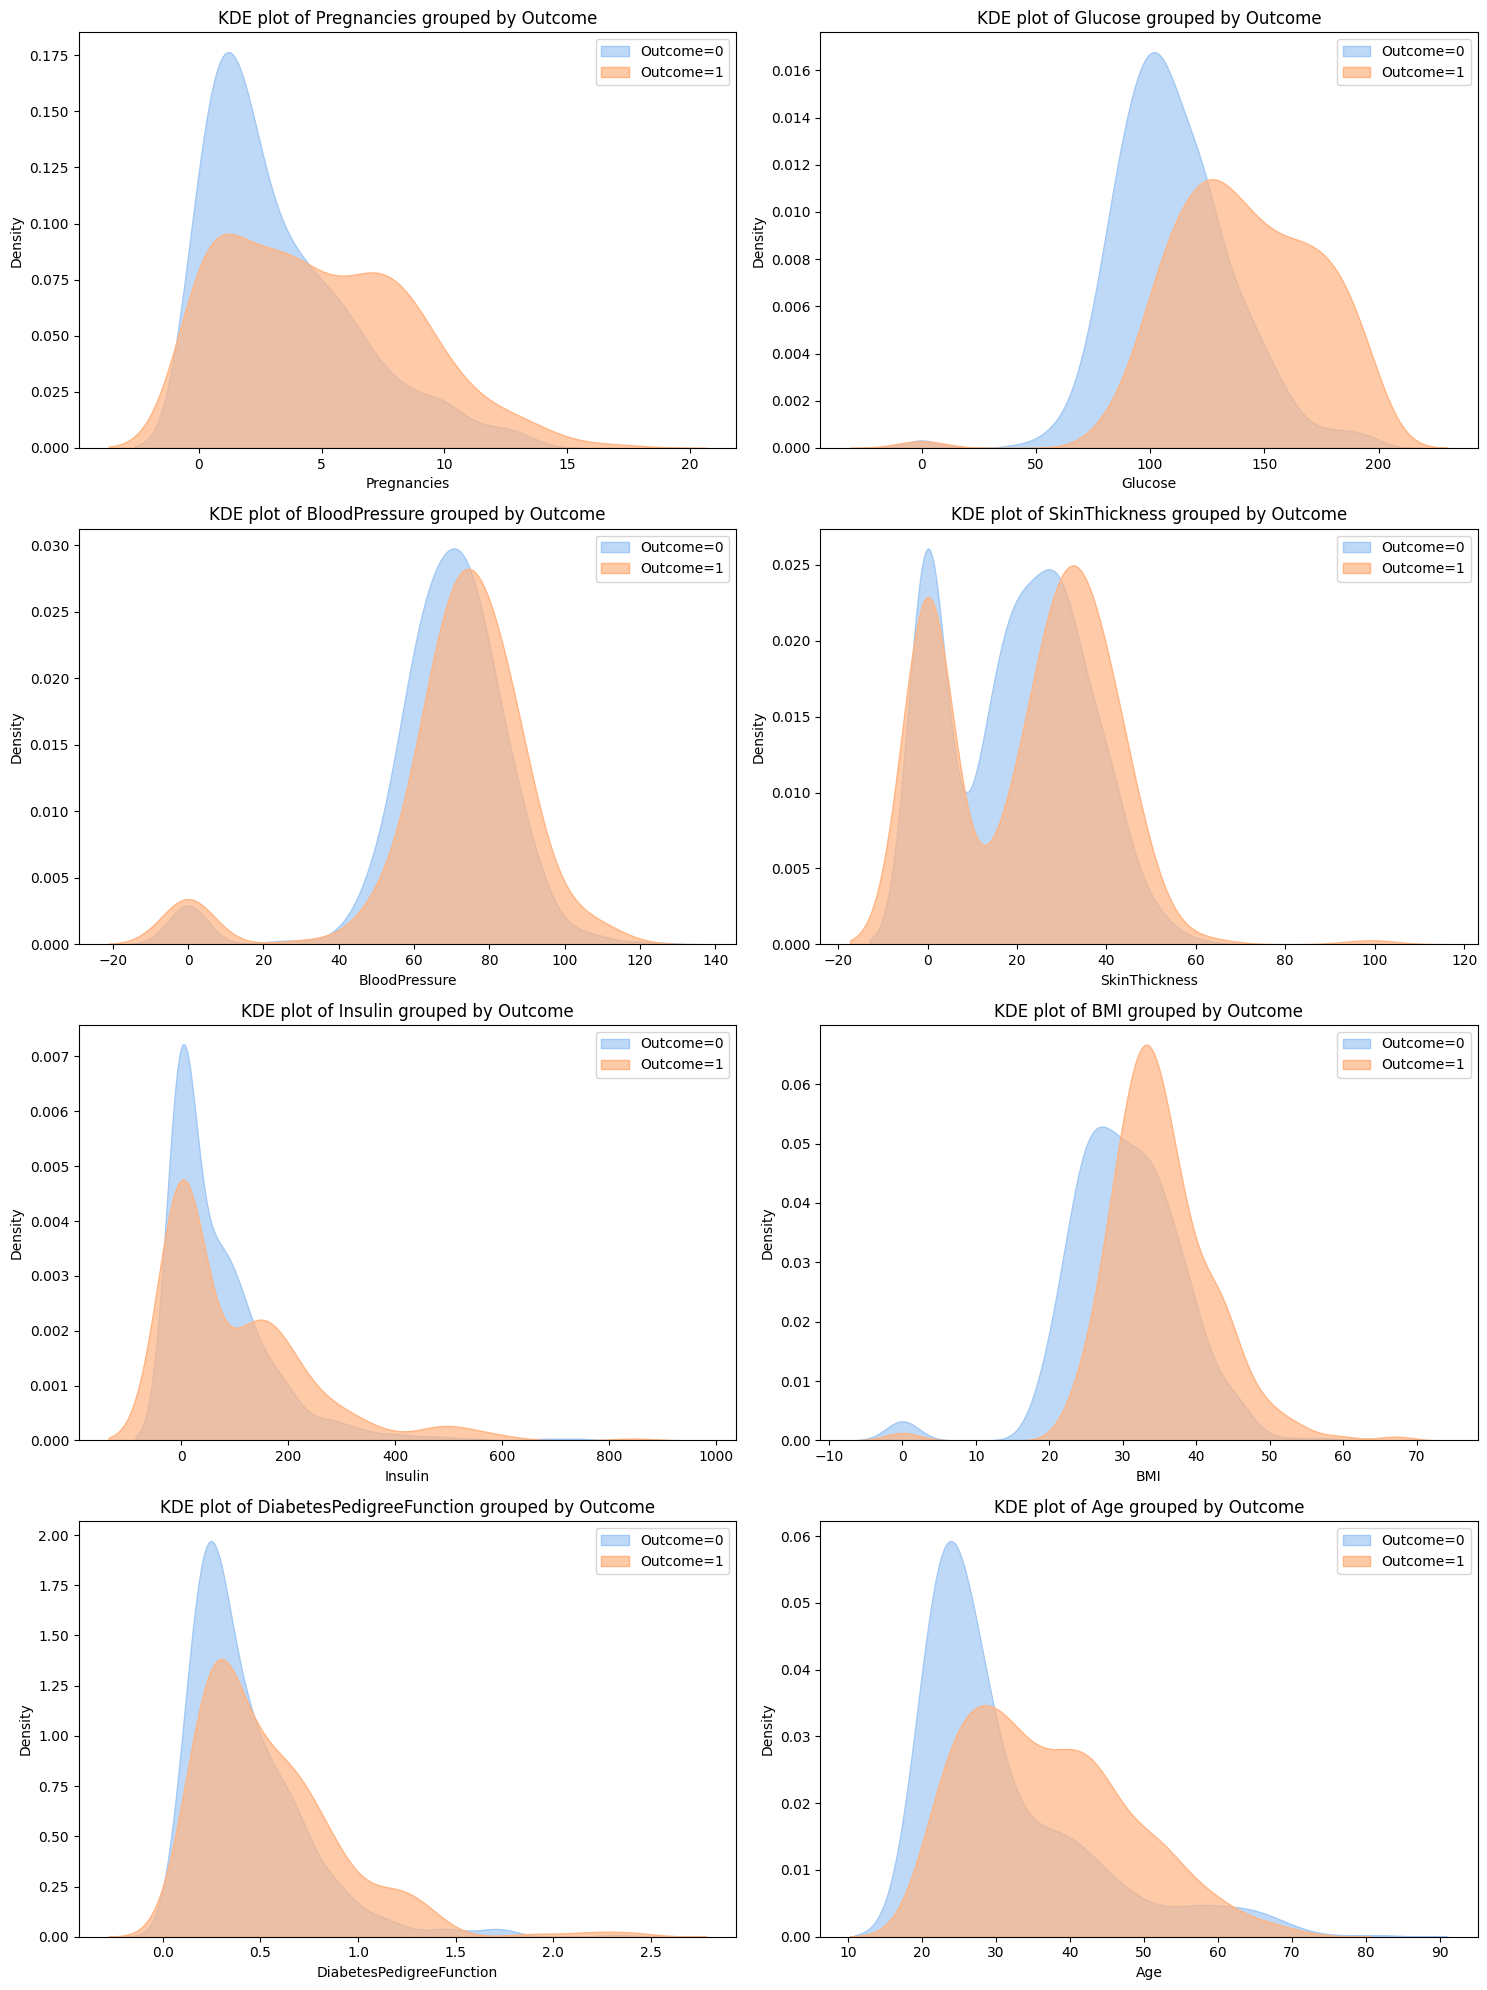

In [16]:
num_columns = len(cd.columns) - 1
num_rows = (num_columns + 1) // 2

colors = sns.color_palette("pastel", 2)

plt.figure(figsize=(15, 5*num_rows))

for i, column in enumerate(cd.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)

    sns.kdeplot(data=cd[cd['Outcome'] == 0][column], label='Outcome=0', fill=True, color=colors[0], alpha=0.7)

    sns.kdeplot(data=cd[cd['Outcome'] == 1][column], label='Outcome=1', fill=True, color=colors[1], alpha=0.7)

    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

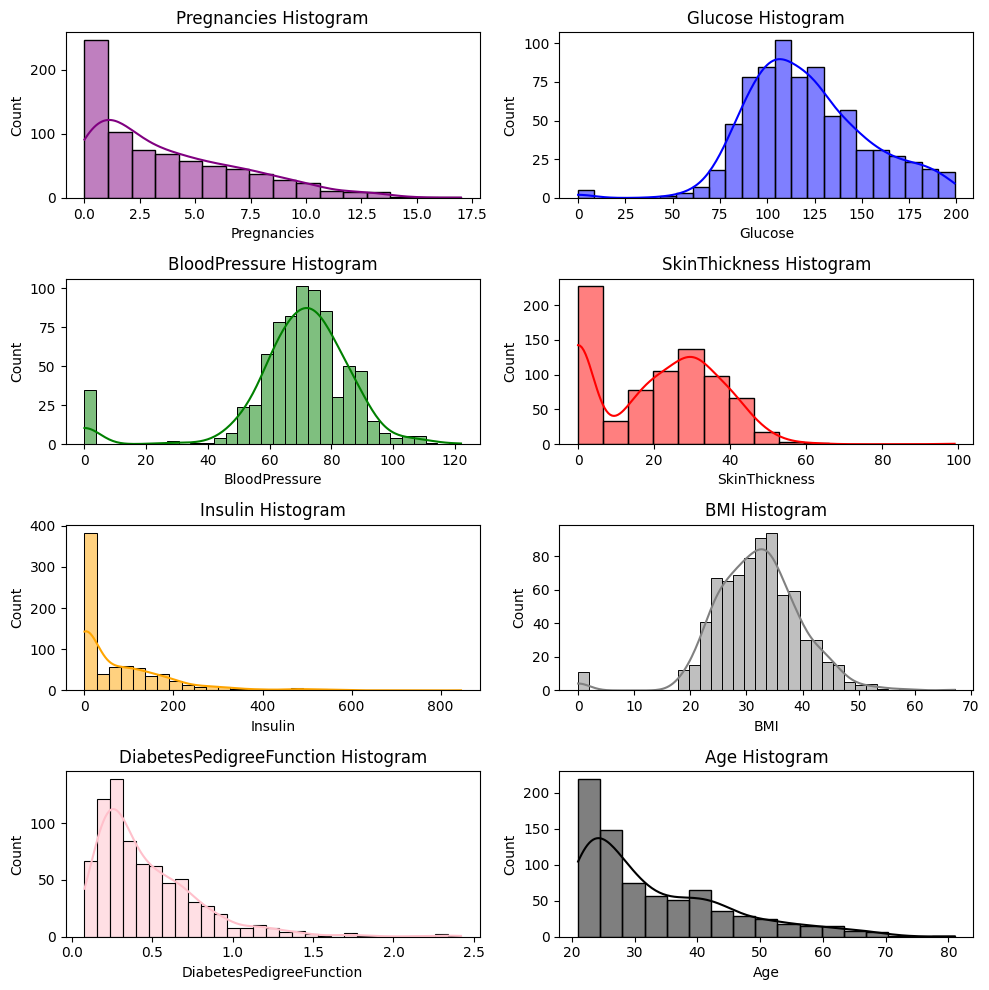

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

sns.histplot(data=cd['Pregnancies'],kde=True,ax=axes[0,0],color='purple').set(title='Pregnancies Histogram')
sns.histplot(data=cd['Glucose'],kde=True,ax=axes[0,1],color='blue').set(title='Glucose Histogram')
sns.histplot(data=cd['BloodPressure'],kde=True,ax=axes[1,0],color='green').set(title='BloodPressure Histogram')
sns.histplot(data=cd['SkinThickness'],kde=True,ax=axes[1,1],color='red').set(title='SkinThickness Histogram')
sns.histplot(data=cd['Insulin'],kde=True,ax=axes[2,0],color='orange').set(title='Insulin Histogram')
sns.histplot(data=cd['BMI'],kde=True,ax=axes[2,1],color='grey').set(title='BMI Histogram')
sns.histplot(data=cd['DiabetesPedigreeFunction'],kde=True,ax=axes[3,0],color='pink').set(title='DiabetesPedigreeFunction Histogram')
sns.histplot(data=cd['Age'],kde=True,ax=axes[3,1],color='black').set(title='Age Histogram')


plt.tight_layout()
plt.show()

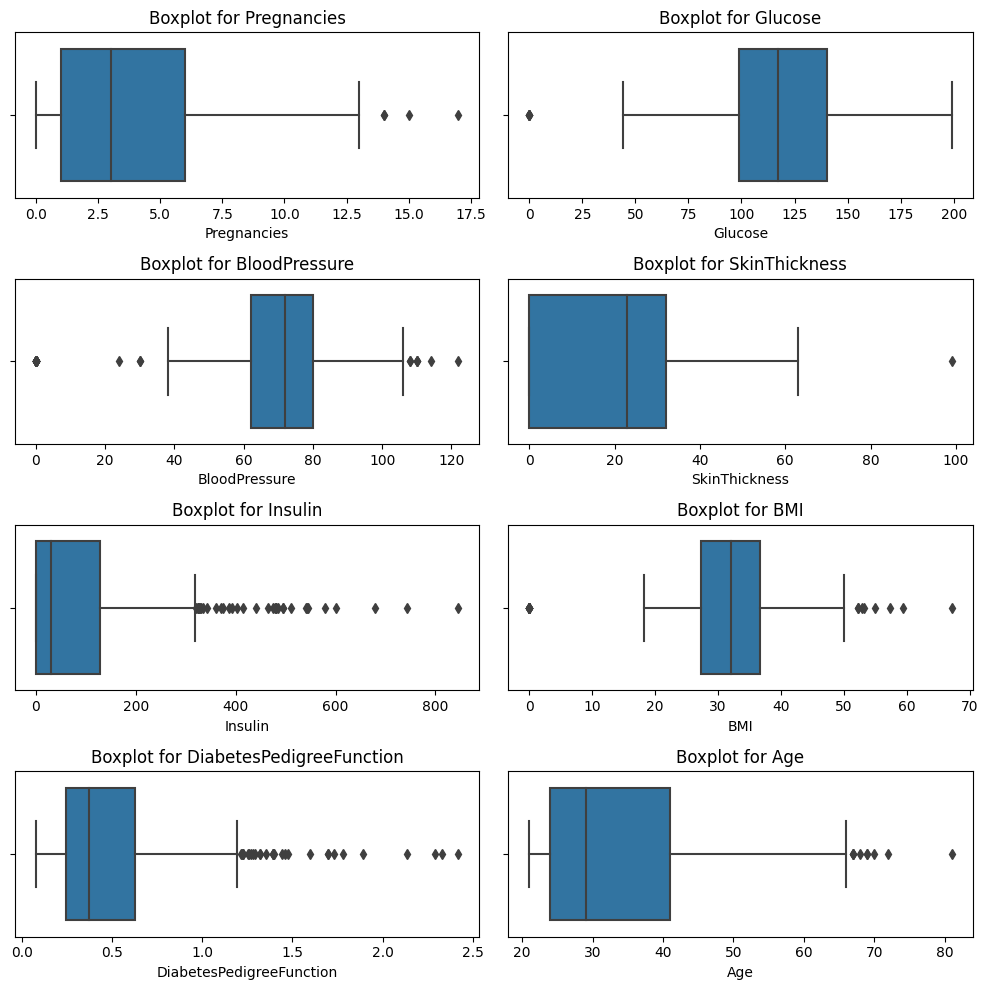

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

sns.boxplot(x=cd['Pregnancies'], ax=axes[0,0]).set(title='Boxplot for Pregnancies')
sns.boxplot(x=cd['Glucose'], ax=axes[0,1]).set(title='Boxplot for Glucose')
sns.boxplot(x=cd['BloodPressure'], ax=axes[1,0]).set(title='Boxplot for BloodPressure')
sns.boxplot(x=cd['SkinThickness'], ax=axes[1,1]).set(title='Boxplot for SkinThickness')
sns.boxplot(x=cd['Insulin'], ax=axes[2,0]).set(title='Boxplot for Insulin')
sns.boxplot(x=cd['BMI'], ax=axes[2,1]).set(title='Boxplot for BMI')
sns.boxplot(x=cd['DiabetesPedigreeFunction'], ax=axes[3,0]).set(title='Boxplot for DiabetesPedigreeFunction')
sns.boxplot(x=cd['Age'], ax=axes[3,1]).set(title='Boxplot for Age')

plt.tight_layout()
plt.show()

We have not created copy dataset but we can.

### Handling Outliers

Changing outliers with lower fefnce r upper fence value

In [19]:
Q1=cd['Glucose'].quantile(0.25)
Q3=cd['Glucose'].quantile(0.75)
IQR=Q3-Q1
Lower_Bound_G=Q1-1.5*IQR
Upper_Bound_G=Q3+1.5*IQR

cd.loc[cd["Glucose"] < Lower_Bound_G, "Glucose"] = Lower_Bound_G

/tmp/ipykernel_26/1841667440.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cd.loc[cd["Glucose"] < Lower_Bound_G, "Glucose"] = Lower_Bound_G


In [20]:
Q1=cd['BMI'].quantile(0.25)
Q3=cd['BMI'].quantile(0.75)
IQR=Q3-Q1
Lower_Bound_B=Q1-1.5*IQR
Upper_Bound_B=Q3+1.5*IQR

cd.loc[cd["BMI"] < Lower_Bound_B, "BMI"] = Lower_Bound_B
cd.loc[cd["BMI"] > Upper_Bound_B, "BMI"] = Upper_Bound_B

In [21]:
Q1=cd['Age'].quantile(0.25)
Q3=cd['Age'].quantile(0.75)
IQR=Q3-Q1
Lower_Bound_A=Q1-1.5*IQR
Upper_Bound_A=Q3+1.5*IQR

cd.loc[cd["Age"] > Upper_Bound_A, "Age"] = Upper_Bound_A

/tmp/ipykernel_26/4238060839.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cd.loc[cd["Age"] > Upper_Bound_A, "Age"] = Upper_Bound_A


After treating outliers

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


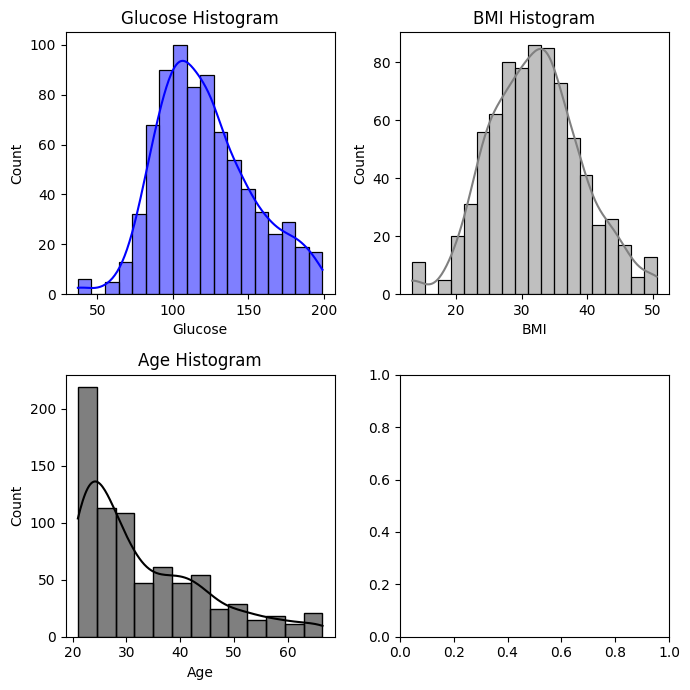

In [22]:
fig, axes = plt.subplots(2, 2,figsize=(7, 7))

sns.histplot(data=cd['Glucose'],kde=True,ax=axes[0,0],color='blue').set(title='Glucose Histogram')
sns.histplot(data=cd['BMI'],kde=True,ax=axes[0,1],color='grey').set(title='BMI Histogram')
sns.histplot(data=cd['Age'],kde=True,ax=axes[1,0],color='black').set(title='Age Histogram')

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Glucose'>

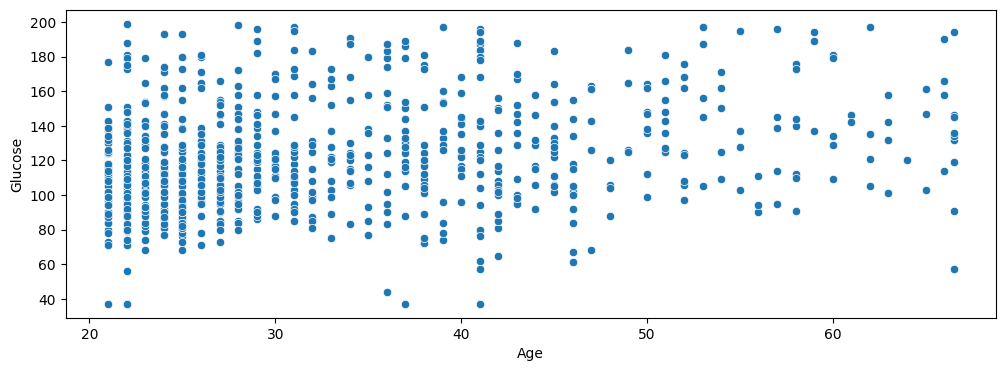

In [23]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=cd,x='Age',y='Glucose')

<Axes: xlabel='Age', ylabel='Glucose'>

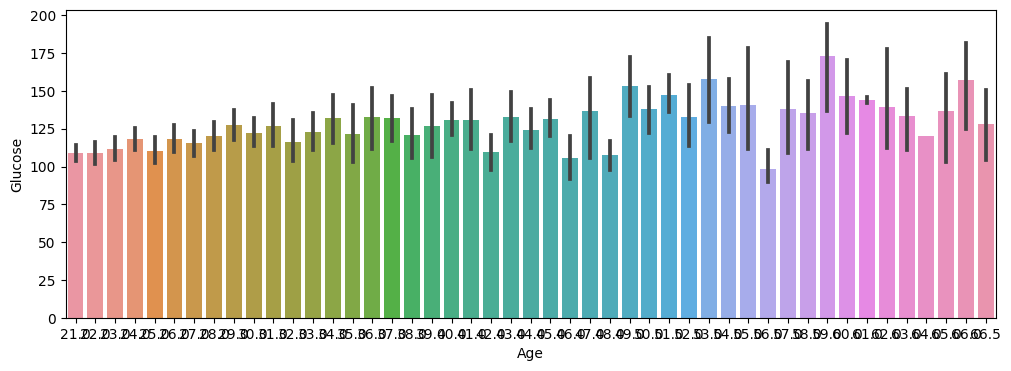

In [24]:
plt.figure(figsize=(12,4))
sns.barplot(data=cd,x='Age',y='Glucose')

### Feature Engineering

For handling imbalance dataset we will use SMOTE (Synthetic Minority Over-sampling Technique) 

Using Glucose,BMI,Age as features of our dataset

In [25]:
x=cd.loc[::,['Glucose','BMI','Age']]
y=cd['Outcome']

#Handling imbalanced dataset
from collections import Counter
print("Count of Target before over sampling: ",Counter(y))

from imblearn.over_sampling import SMOTE
os = SMOTE(sampling_strategy='minority',random_state=2)
x_over,y_over = os.fit_resample(x,y)
print("Count of Target after over sampling: ",Counter(x_over))


Count of Target before over sampling:  Counter({0: 500, 1: 268})
Count of Target after over sampling:  Counter({'Glucose': 1, 'BMI': 1, 'Age': 1})


## Machine Learning

Splitting the dataset into testing and training dataset

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

Using four different ML models with model evaluation

## Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred_lr=lr.predict(x_test)
print(x_test)
print(y_pred_lr)

     Glucose    BMI   Age
158     88.0  29.00  22.0
251    129.0  28.00  27.0
631    102.0  34.50  24.0
757    123.0  36.30  52.0
689    144.0  46.10  46.0
..       ...    ...   ...
225     87.0  34.60  22.0
387    105.0  43.30  45.0
120    162.0  50.55  25.0
7      115.0  35.30  29.0
729     92.0  30.10  22.0

[231 rows x 3 columns]
[0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0]


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score: ",accuracy_score(y_test,y_pred_lr))
print("------bin----------------------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_lr))
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred_lr))

Accuracy Score:  0.7662337662337663
------bin----------------------------------------------------
Confusion Matrix
[[136  19]
 [ 35  41]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       155
           1       0.68      0.54      0.60        76

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



<Axes: >

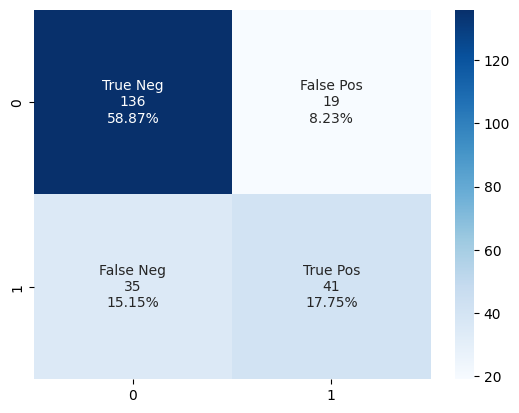

In [29]:
#Visulization of Confusion Matrix - Logistic Regression
cm_lr=confusion_matrix(y_test,y_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr, annot=labels, fmt='', cmap='Blues')

## K Nearest Neighbours Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
a=knn.fit(x_train,y_train)

y_pred_knn=knn.predict(x_test)
print(a)
print(y_pred_knn)

KNeighborsClassifier()
[0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 0 0 0 0]


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score: ",accuracy_score(y_test,y_pred_knn))
print("----------------------------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_knn))
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred_knn))

Accuracy Score:  0.7532467532467533
----------------------------------------------------------
Confusion Matrix
[[135  20]
 [ 37  39]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       155
           1       0.66      0.51      0.58        76

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



<Axes: >

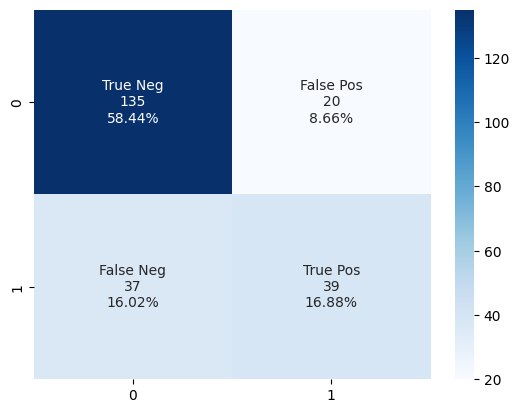

In [32]:
#Visulization of Confusion Matrix - KNN
cm_knn=confusion_matrix(y_test,y_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_knn.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_knn, annot=labels, fmt='', cmap='Blues')

## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)

y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [34]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_rf))
print("----------------------------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_rf))
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred_rf))

Accuracy Score:  0.7878787878787878
----------------------------------------------------------
Confusion Matrix
[[134  21]
 [ 28  48]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       155
           1       0.70      0.63      0.66        76

    accuracy                           0.79       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.79      0.79       231



<Axes: >

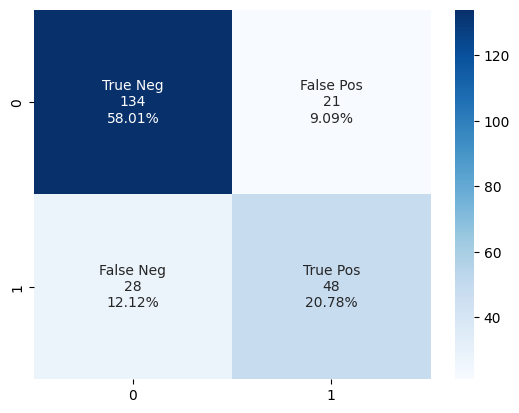

In [35]:
#Visulization of Confusion Matrix - Random Forest
cm_rf=confusion_matrix(y_test,y_pred_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rf.flatten()/np.sum(cm_rf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf, annot=labels, fmt='', cmap='Blues')

## Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred_dt=dt.predict(x_test)
y_pred_dt

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [37]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_dt))
print("----------------------------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_dt))
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred_dt))

Accuracy Score:  0.7056277056277056
----------------------------------------------------------
Confusion Matrix
[[120  35]
 [ 33  43]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       155
           1       0.55      0.57      0.56        76

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.71      0.71      0.71       231



<Axes: >

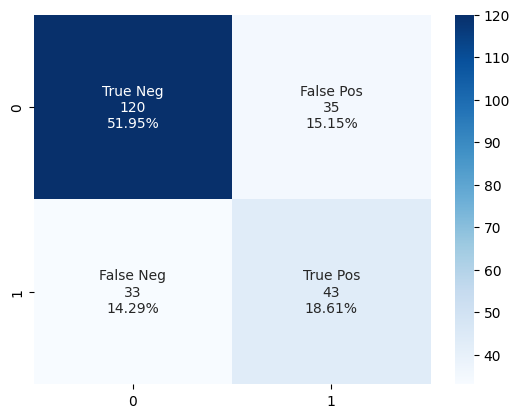

In [38]:
#Visulization of Confusion Matrix - Random Forest
cm_dt=confusion_matrix(y_test,y_pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt='', cmap='Blues')

## Other

In [39]:
cd[cd['BloodPressure']>100].shape[0]

13

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


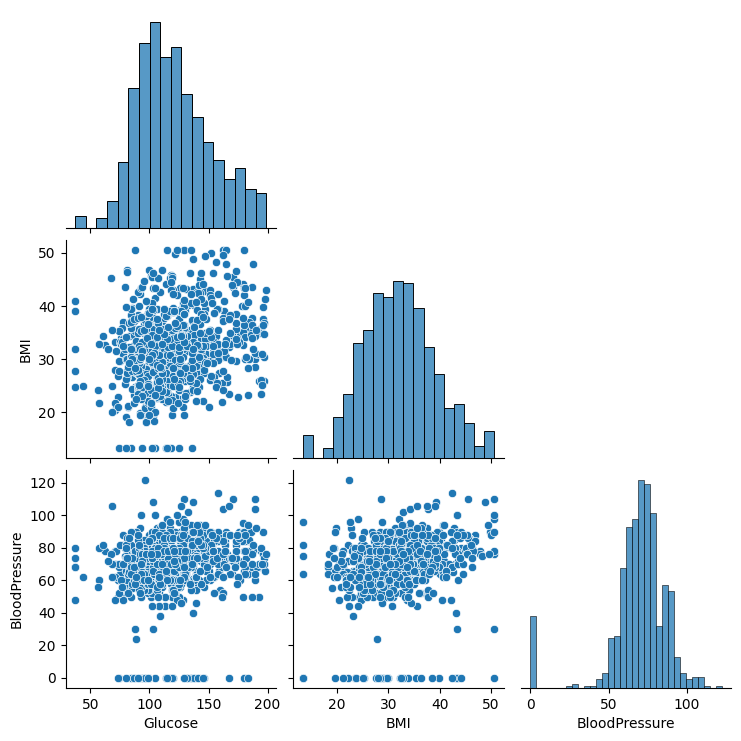

In [40]:
sns.pairplot(data=cd,vars=('Glucose','BMI','BloodPressure'),corner=True)

<Axes: xlabel='Glucose', ylabel='Insulin'>

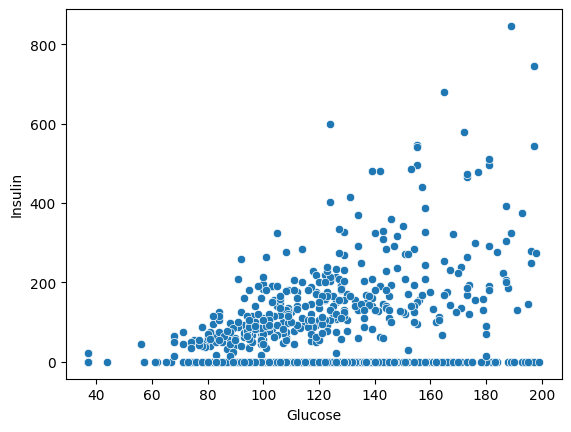

In [41]:
sns.scatterplot(data=cd,x='Glucose',y='Insulin')

In [42]:
import joblib
# using joblib to deploy ML model
joblib.dump(cd, 'dataset1.joblib')

['dataset1.joblib']